In [1]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.6/376.0 MB 15.1 MB/s eta 0:00:25
    --------------------------------------- 8.1/376.0 MB 21.0 MB/s eta 0:00:18
   - -------------------------------------- 12.3/376.0 MB 20.9 MB/s eta 0:00:18
   - -------------------------------------- 16.3/376.0 MB 20.5 MB/s eta 0:00:18
   -- ------------------------------------- 20.4/376.0 MB 20.2 MB/s eta 0:00:18
   -- ------------------------------------- 24.9/376.0 MB 20.2 MB/s eta 0:00:18
   --- ------------------------------------ 28.8/376.0 MB 20.1 MB/s eta 0:00:18
   --- ------------------------------------ 33.0/376.0 MB 20.2 MB/s eta 0:00:18
   --- ------------------------------------ 37.2/376.0 MB 20.1 MB/s eta 0:00:17
   ---- ----------------------------------- 41.2/376.0 MB 20.0 MB/s eta 0:00:17
   ---- ----------------------------------- 45.6/376.0 MB 20.0 MB/s eta 0:00:17
   ----- ---------------------------------- 49.8/37

In [3]:
!pip install keras

In [5]:
!pip install pandas

In [7]:
!pip install numpy

In [9]:
!pip install tqdm

In [11]:
!pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---- ----------------------------------- 5.0/46.2 MB 33.7 MB/s eta 0:00:02
   ----- ---------------------------------- 6.8/46.2 MB 19.1 MB/s eta 0:00:03
   --------- ------------------------------ 10.7/46.2 MB 19.2 MB/s eta 0:00:02
   ----------- ---------------------------- 13.1/46.2 MB 19.1 MB/s eta 0:00:02
   ----------- ---------------------------- 13.1/46.2 MB 19.1 MB/s eta 0:00:02
   ------------- -------------------------- 16.0/46.2 MB 13.6 MB/s eta 0:00:03
   --------------- ------------------------ 17.8/46.2 MB 12.8 MB/s eta 0:00:03
   ------------------- -------------------- 22.0/46.2 MB 14.4 MB/s eta 0:00:02
   ---------------------- ----------------- 26.2/46.2 MB 14.4 MB/s eta 0:00:02
   -------------------------- ------------- 30.1/46.2 MB 14.9 MB/s eta 0:00:02
   ----------------------------- ---------- 34.3/46.2 MB 15.4 MB/s eta 0:00:01
   --------------------------------- ------ 38.5/46.2 MB 15.8 M

In [3]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [4]:
TRAIN_DIR="F:/GOOGLE DRIVE LARGE FILES/archive/images/images/train"
TEST_DIR="F:/GOOGLE DRIVE LARGE FILES/archive/images/images/validation"

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                                   image     label
0      F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
1      F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
2      F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
3      F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
4      F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
...                                                  ...       ...
28816  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
28817  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
28818  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
28819  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
28820  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise

[28821 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)
print(test['image'])

                                                  image     label
0     F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
1     F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
2     F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
3     F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
4     F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...     angry
...                                                 ...       ...
7061  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
7062  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
7063  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
7064  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise
7065  F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...  surprise

[7066 rows x 2 columns]
0       F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...
1       F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...
2       F:/GOOGLE DRIVE LARGE FILES/archive/images/ima...
3       F

In [10]:
from tqdm import tqdm
tqdm(disable=True)  

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1) #reshaping the image
    return features

In [12]:
train_features = extract_features(train['image']) 

100%|███████████████████████████████████████████████████████████████████████████| 28821/28821 [03:10<00:00, 150.97it/s]


In [13]:
test_features = extract_features(test['image'])

100%|█████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:46<00:00, 151.78it/s]


In [14]:
x_train = train_features/255.0 #converts your pixel values to the range [0, 1].
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
LabelEncoder()

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(48, 48, 1)))  # Explicit input layer

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))


In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test))

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 143s 621ms/step - accuracy: 0.2367 - loss: 1.8374 - val_accuracy: 0.2583 - val_loss: 1.8094
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 626ms/step - accuracy: 0.2481 - loss: 1.8122 - val_accuracy: 0.2627 - val_loss: 1.7830
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 643ms/step - accuracy: 0.2560 - loss: 1.7786 - val_accuracy: 0.3285 - val_loss: 1.6629
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 643ms/step - accuracy: 0.3148 - loss: 1.6892 - val_accuracy: 0.3821 - val_loss: 1.5561
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 146s 646ms/step - accuracy: 0.3795 - loss: 1.5783 - val_accuracy: 0.4556 - val_loss: 1.4135
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 147s 649ms/step - accuracy: 0.4325 - loss: 1.4809 - val_accuracy: 0.4813 - val_loss: 1.3536
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 147s 649ms/step - accuracy: 0.4394 - loss: 1.4513 - val_accuracy: 0.4932 - val_loss: 1.3285
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 644ms/step - accuracy: 0.4595 -

In [62]:
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [64]:
from keras.models import model_from_json

In [72]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [74]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [84]:
def ef(image):
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)  #(batch_size, height, width, channels)  just 1 image
    return feature/255.0

In [86]:
image = "F:/GOOGLE DRIVE LARGE FILES/archive/images/train/sad/42.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
model prediction is  sad


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
model prediction is  sad


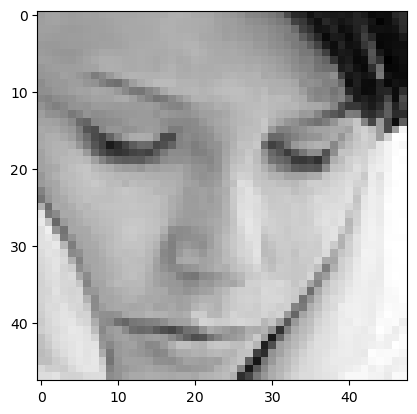

In [92]:
image = "F:/GOOGLE DRIVE LARGE FILES/archive/images/train/sad/42.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
model prediction is  sad


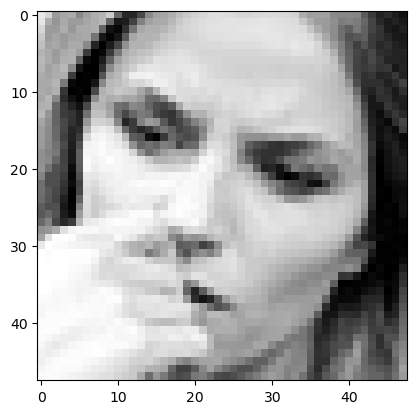

In [94]:
image = "F:/GOOGLE DRIVE LARGE FILES/archive/images/train/fear/2.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
model prediction is  disgust


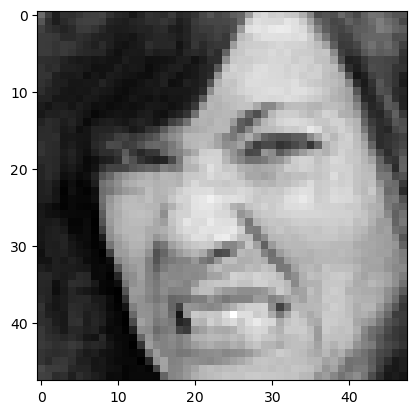

In [98]:
image = "F:/GOOGLE DRIVE LARGE FILES/archive/images/train/disgust/388.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
model prediction is  happy


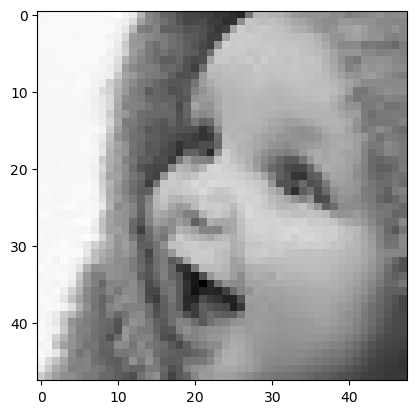

In [104]:
image = "F:/GOOGLE DRIVE LARGE FILES/archive/images/train/happy/64.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
model prediction is  surprise


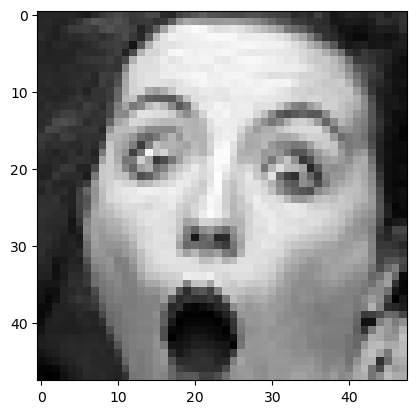

In [106]:
image ="F:/GOOGLE DRIVE LARGE FILES/archive/images/train/surprise/193.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()